## Integrantes

1. Diego Irarrazaval

# Instrucciones

El laboratorio tiene 6ptos, donde obtener 6 ptos equivale a un 7.0 y 0 ptos a un 1.0. El formato de entrega será subir a u-cursos un **único** jupyter notebook por grupo.
El notebook debe ejecutar desde la primera celda a la última **sin errores**. Todo el código debe estar en el mismo notebook. El código debe estar en un formato **presentable** y **ejecutado**.


**Nota:** Se descontará puntaje si adjunta gráficos sin descripción. Para esto puede añadir una descripción en los atributos xlabel, ylabel y título; o añadir una celda markdown debajo del gráfico de la forma "**Figura x:** descripción detallada...".

# Problema

Neural Information Processing Systems (NIPS) es una de las conferencias más importantes sobre machine learning en el mundo. El objetivo de este laboratorio es hallar los temás presentes en las publicaciones científicas (papers) presentados en esta conferencia, de esta manera una persona no muy entendida en el tema de machine learning puede tener una idea de las distintas líneas de investigación que existen. La base de datos con la que cuenta para repsonder esta pregunta incluye títulos, autores, abstract, y el texto presente de todos los papers del NIPS desde 1987 hasta el 2016. Por simplicidad, se trabaja solo con los abstract de los papers que son guardados en la variable **corpus**.

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
# Para un grafico bonito:
from wordcloud import WordCloud

In [ ]:
## Se Debe subir un .zip con los datos!!
from google.colab import files
if not os.path.exists('/content/data.zip'):
  uploaded = files.upload()
  !unzip /content/data.zip

In [ ]:
df = pd.read_csv("/content/data/papers.csv")
df.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [ ]:
corpus = df[df["abstract"]!='Abstract Missing']["abstract"].tolist()
corpus[0]

'Non-negative matrix factorization (NMF) has previously been shown to \r\nbe a useful decomposition for multivariate data. Two different multi- \r\nplicative algorithms for NMF are analyzed. They differ only slightly in \r\nthe multiplicative factor used in the update rules. One algorithm can be \r\nshown to minimize the conventional least squares error while the other \r\nminimizes the generalized Kullback-Leibler divergence. The monotonic \r\nconvergence of both algorithms can be proven using an auxiliary func- \r\ntion analogous to that used for proving convergence of the Expectation- \r\nMaximization algorithm. The algorithms can also be interpreted as diag- \r\nonally rescaled gradient descent, where the rescaling factor is optimally \r\nchosen to ensure convergence. '

# A. Investigación (1.5 ptos)
(no entendi bien que era esto asique hice lo que pude/entendi)

## A.1 ¿Que es el modelado de tópicos? (0.75 ptos)

Explique en que consiste el modelado de tópicos, para qué sirve y de dos ejemplos de uso distintos al problema del laboratorio.

**Topic Modeling** es un tipo de modelamiento estadistico usado para descubrir o encontrar los temas 'abstractos' de un documento. Esto cae en la categoria de aprendizaje no supervizado, es decir, la data no tiene etiqueta asociada, por lo que se buscan patrones o similitudes entre los documentos utilizando solo el contenido. Se podria identificar como una forma de clusterizar documentos. 

Ejemplos de uso:
- una compania quiere separar las resenas de un producto dependiendo (no del sentimiento) del tema que hablan. Por ejemplo, si es de autos, unos hablan de equipamiento interior, otros de motor, y mas. Esto se puede con modelamiento de topicos. 
- Se puede usar tambien para separar libros en una biblioteca virtual sin necesidad de saber realmente de que tratan. 


## A.2 ¿Qué es LDA? (0.75 pto)

Explique en palabras qué es LDA, qué es $K$, $\phi_{k}$ y $\pi_{d}$.

Latent Dirichlet Allocation, LDA, 

- **$K$:** corresponde al numero de topicos o temas.
- **$\phi_{k}$:** Vector $V$ dimensional (cantidad de palabras del corpus) con la probabilidad de que la palabra $v$ este en el tema $k$.
- **$\pi_{d}$:** Distribucion de topicos en el documento $d$: vector $K$ dimensional con la probabilidad de que cada topico $k$ ocurra en el documento $d$. Debe sumar 1

(Ojo con mezclar notaciones, en wikipedia y otras fuentes es algo distinta)
[Wikipedia, LDA](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation)

# B. Preparación (2.5 ptos)

Esta sección tiene por objetivo crear una base de datos consolidada para el uso de modelos de tópicos.

Eliminar stopwords, tokenizar y aplicar stem es suficiente para estos problemas. 

## B.1 Análisis exploratorio inicial (0.25 ptos)

Compute la cantidad de tokens y el tamaño del vocabulario del corpus sin realizar ningún tipo de procesamiento.

In [ ]:
sum([len(abs) for abs in corpus])

3942905

In [ ]:
# para obtener las palabras unicas
from nltk import word_tokenize

counter1 = Counter()
for abs in corpus:
  counter1.update(abs.split(' '))
unique1 = counter1.keys()
len(unique1)

35502

In [ ]:
len(corpus)

3924

In [ ]:
words = {}
# Contamos las palabras mas frecuentes:
for abs in corpus:
  for word in abs.lower().split():
      word = word.replace(".","")
      word = word.replace(",","")
      word = word.replace(":","")
      word = word.replace("\"","")
      word = word.replace("!","")
      word = word.replace("â€œ","")
      word = word.replace("â€˜","")
      word = word.replace("*","")
      if word not in words:
          words[word] = 1
      else:
          words[word] += 1

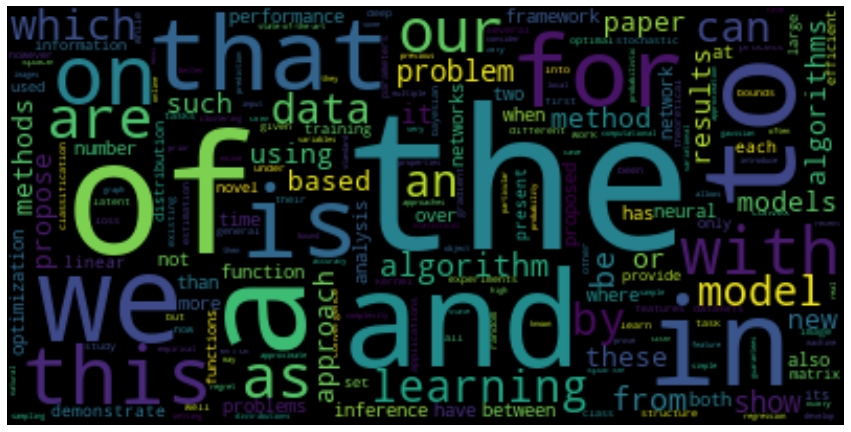

In [ ]:
wc_ws = WordCloud().generate_from_frequencies(words)
plt.figure(figsize=(15,10))
plt.imshow(wc_ws, interpolation="bilinear")
plt.axis("off")
plt.show()

Se observa que las principales palabras son conectores en ingles. Esto no aporta informacion acerca de las tematicas que se veran en la conferencia.


## B.2 Limpieza de los datos (1.0 pto)

Cree una función de tokenización que procese los papers. Escoja un ejemplo del conjunto de datos y muestra como se ve antes y despues de aplicar el procesamiento. Esta función debe eliminar patrónes de caracteres característicos del corpus que no aportan información (por ejemplo: "\r") y eliminar stopwords que se encuentran en el archivo adjunto (**stopwords.txt**). Compute la cantidad de tokens y el tamaño del vocabulario resultante de aplicar este nivel de procesamiento al corpus. ¿Por qué se deben eliminar las stopwords?

**Hint**: para eliminar patrónes de caracteres puede usar la función **re.sub()**.

In [ ]:
# Stopwords
stopwords = set(line.strip() for line in open('/content/data/stopwords.txt'))
stopwords.add('')
stopwords.add(' ')

wordcount = {}
# Contamos las palabras mas frecuentes (sin contar los stop words:)
for abs in corpus:
  for word in abs.lower().split():
      word = word.replace(".","")
      word = word.replace(",","")
      word = word.replace(":","")
      word = word.replace("\"","")
      word = word.replace("!","")
      word = word.replace("â€œ","")
      word = word.replace("â€˜","")
      word = word.replace("*","")
      if word not in stopwords:
          if word not in wordcount:
              wordcount[word] = 1
          else:
              wordcount[word] += 1

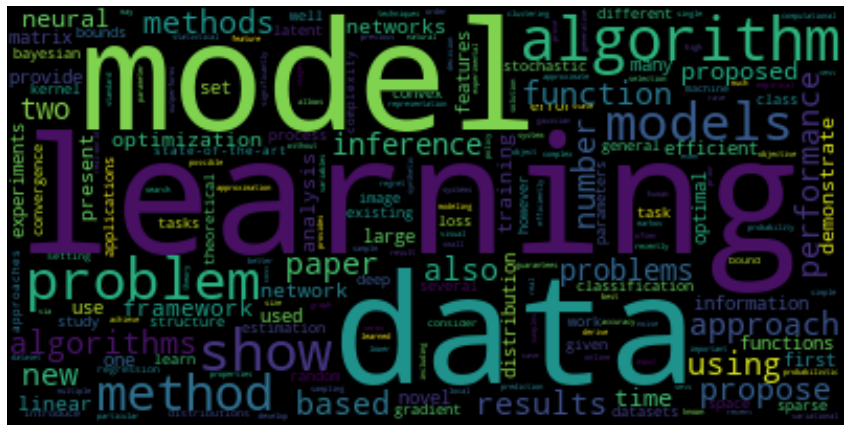

In [ ]:
wc = WordCloud().generate_from_frequencies(wordcount)
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

Observemos que al eliminar las stopwords, la informacion que nos entrega el grafico puede ser util respecto de los temas de la conferencia. 

In [ ]:
# librerias para NLP
import gensim
from collections import Counter
from nltk.stem import SnowballStemmer
import numpy as np
np.random.seed(2020)
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
stemmer = SnowballStemmer('english')
clean_corpus = []
for abs in corpus:
  # abs_clean = [word for ]
  clean_corpus.append(
    [stemmer.stem(str(token)) for token in [word for word in abs.split(' ') if word not in stopwords] ]
  )

In [ ]:
clean_corpus[0]

['non-neg',
 'matrix',
 'factor',
 '(nmf)',
 'previous',
 'shown',
 '\r\nbe',
 'use',
 'decomposit',
 'multivari',
 'data.',
 'two',
 'differ',
 'multi-',
 '\r\nplicat',
 'algorithm',
 'nmf',
 'analyzed.',
 'they',
 'differ',
 'slight',
 '\r\nthe',
 'multipl',
 'factor',
 'use',
 'updat',
 'rules.',
 'one',
 'algorithm',
 '\r\nshown',
 'minim',
 'convent',
 'least',
 'squar',
 'error',
 '\r\nminim',
 'general',
 'kullback-leibl',
 'divergence.',
 'the',
 'monoton',
 '\r\nconverg',
 'algorithm',
 'proven',
 'use',
 'auxiliari',
 'func-',
 '\r\ntion',
 'analog',
 'use',
 'prove',
 'converg',
 'expectation-',
 '\r\nmaxim',
 'algorithm.',
 'the',
 'algorithm',
 'also',
 'interpret',
 'diag-',
 '\r\nonal',
 'rescal',
 'gradient',
 'descent,',
 'rescal',
 'factor',
 'optim',
 '\r\nchosen',
 'ensur',
 'convergence.']

In [ ]:
# Cantidad total de tokens:
sum([len(abs) for abs in clean_corpus])

373158

In [ ]:
# para obtener las palabras unicas
from nltk import word_tokenize

counter = Counter()
for abs in clean_corpus:
  counter.update(abs)
unique = counter.keys()


In [ ]:
len(unique)

27849

## B.3 Post procesamiento (1.0)

Realice un postprocesamietno del corpus que sirva para reducir aún más el vocabulario: análisis de palabras muy frecuentes, poco frecuentes, errores ortográficos, etc. Compute la cantidad de tokens y el tamaño del vocabulario resultante de aplicar este nivel de procesamiento al corpus. Complete el cuadro resumen de estadísticas.

|Etapa|tokens|vocabulario|
|---|---|---|
|A.1|3942905|35502|
|A.2|||
|A.3|373158|27849|

Analisar las faltas de ortografia no tiene mucho sentido luego de aplicar lematizacion y stemming ya que las palabras se reducen a su raiz. 

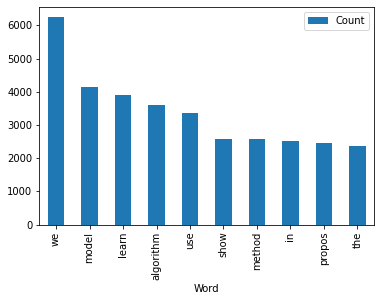

In [ ]:
# 10 palabras mas comunes:
lst = counter.most_common(10)
df = pd.DataFrame(lst, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count')

Se observa que las mas comunes son de temas relacionados a ML: Modelos, learn, algorithm. 

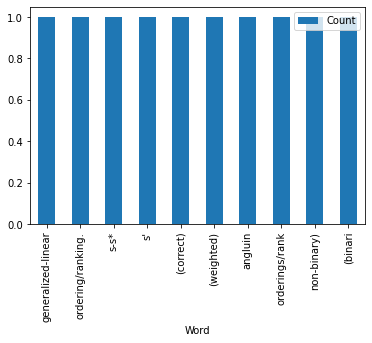

In [ ]:
# palabras menos comunes:
lst = counter.most_common()[:-10-1:-1]
df = pd.DataFrame(lst, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count')

# C. LDA (2ptos)

En este sección tiene por objetivo descubrir los tópicos presentes en el corpus. Documentación de LDA:

https://radimrehurek.com/gensim/models/ldamodel.html

## C.1 Corpus (0.5 ptos)

Genere el corpus el formato que lda requiere e imprima un ejemplo de un documento en dicho formato y en el formato original.

In [ ]:
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
import gensim.models

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy


In [ ]:
print(clean_corpus[0])

['non-neg', 'matrix', 'factor', '(nmf)', 'previous', 'shown', '\r\nbe', 'use', 'decomposit', 'multivari', 'data.', 'two', 'differ', 'multi-', '\r\nplicat', 'algorithm', 'nmf', 'analyzed.', 'they', 'differ', 'slight', '\r\nthe', 'multipl', 'factor', 'use', 'updat', 'rules.', 'one', 'algorithm', '\r\nshown', 'minim', 'convent', 'least', 'squar', 'error', '\r\nminim', 'general', 'kullback-leibl', 'divergence.', 'the', 'monoton', '\r\nconverg', 'algorithm', 'proven', 'use', 'auxiliari', 'func-', '\r\ntion', 'analog', 'use', 'prove', 'converg', 'expectation-', '\r\nmaxim', 'algorithm.', 'the', 'algorithm', 'also', 'interpret', 'diag-', '\r\nonal', 'rescal', 'gradient', 'descent,', 'rescal', 'factor', 'optim', '\r\nchosen', 'ensur', 'convergence.']


In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(clean_corpus, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[clean_corpus], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [ ]:
# Form Bigrams
data_words_bigrams = make_bigrams(clean_corpus)

In [ ]:
id2word = corpora.Dictionary(clean_corpus)

texts = clean_corpus

corpus = [id2word.doc2bow(text) for text in clean_corpus]

In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
# Print the Keyword in the 10 topics
from pprint import pprint
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.041*"neural" + 0.034*"activ" + 0.018*"dynam" + 0.017*"neuron" + '
  '0.016*"code" + 0.016*"brain" + 0.015*"popul" + 0.014*"spike" + '
  '0.013*"respons" + 0.010*"still"'),
 (1,
  '0.063*"bayesian" + 0.031*"agent" + 0.026*"game" + 0.016*"variat" + '
  '0.014*"chain" + 0.013*"substanti" + 0.013*"posterior" + 0.013*"mont" + '
  '0.012*"nonparametr" + 0.012*"expert"'),
 (2,
  '0.026*"question" + 0.025*"project" + 0.024*"dimens" + 0.018*"feedback" + '
  '0.018*"greedi" + 0.016*"salienc" + 0.015*"first," + 0.013*"forward" + '
  '0.012*"{\\em" + 0.011*"second,"'),
 (3,
  '0.036*"learn" + 0.029*"we" + 0.028*"model" + 0.025*"use" + 0.017*"propos" + '
  '0.017*"data" + 0.013*"train" + 0.013*"the" + 0.013*"approach" + 0.012*"in"'),
 (4,
  '0.153*"network" + 0.072*"deep" + 0.069*"neural" + 0.031*"convolut" + '
  '0.029*"architectur" + 0.020*"recurr" + 0.018*"layer" + 0.014*"varianc" + '
  '0.012*"networks," + 0.011*"et"'),
 (5,
  '0.074*"imag" + 0.053*"object" + 0.029*"visual" + 0.020*"g

## C.2  Interpretación de los tópicos (1.5 ptos)
Entrene LDA para que encuentre 10 tópicos ($K=10$). Luego, interprete los tópicos encontrados. Para esto se puede apollar del método **.show_topics**  o de la visualización de **pyLDAvis**. Responde a la siguiente pregunta: ¿Cuáles son los tópicos más relevantes?

In [ ]:
from gensim.models.ldamodel import LdaModel
import pyLDAvis
import pyLDAvis.gensim